<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/ITERATION_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-hsgz8426
  Entered build tracker: /tmp/pip-build-tracker-hsgz8426
  Created temporary directory: /tmp/pip-install-92lh25eq
  Created temporary directory: /tmp/pip-ephem-wheel-cache-18zp9i32
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.7 MB/s eta 0:00:00


In [7]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [8]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [9]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.87, -8.43, -6.52, -4.21, -1.53, 0.54, 1.29, 2.05, 2.76, 3.47, 4.18, 4.89, 5.6, 6.31, 7.02, 7.73, 8.44, 9.15, 9.86]


In [10]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):

    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax


    particles = []
    nSize = np.size(Quasi_Random_Sequence_Initialisation)
    for i in range(nSize):
        position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })
    for _ in range(nPop - nSize):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    print(np.size(particles))

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            # Update Velocity
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']

        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")
        g_values.append(GlobalBest['Cost'])
        w *= wdamp

        w_values.append(w)
        g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [11]:
# def sphere(x):
#     return sum(x**2)

In [12]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [14]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [15]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [16]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [17]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [18]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [19]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [20]:
costs = []
errors = []

In [21]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [22]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

# # Example of how to access results for a particular problem
# problem_1_results = results[1]
# print("\n\n\nProblem 1 Best Cost:", problem_1_results['BestCost'])
# print("Problem 1 Best Position:", problem_1_results['BestPosition'])
# print("Problem 1 Error:", problem_1_results['Error'])

# # Plotting results for one of the problems (e.g., Problem 1)
# plt.plot(problem_1_results['w_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations - Problem 1')
# plt.show()

# plt.plot(problem_1_results['g_values'])
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations - Problem 1')
# plt.show()


<ipython-input-13-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-10-f2f9ec8f53c4>:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']


Streaming output truncated to the last 5000 lines.
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03 -4.31790000e+03
 -4.31790000e+03 -4.31790000e+03 -4.317

In [23]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

4.274625098332763e-11
0.35529029672215984
4.133148649998475e-07
1.0522126103751361e-07
1.3633321539952021
1.4254271374767882
27193.473958933515
0.34127820447611157
734.2872851100834
7592.069890604984
11612.15980494758
9843.803964473189
1486.9835427676462
16082.571400495603
5.94187225448664
682.100000000014
682.1004241452529
13633.667482880792
18352.549862182866
10.100287096286593
5.086204309813482
127928.44979602097
43.37074122835013
114.9784818763946





Problem 1 Best Cost: [ 6.57904765e+04  5.67361317e+04  4.11390009e+04  3.49076397e+04
  2.72794240e+04  1.79803709e+04  1.34205939e+04  1.05446293e+04
  8.22247493e+03  7.21229520e+03  5.15442840e+03  2.44704661e+03
  1.35495915e+03  1.35495915e+03  8.85425321e+02  3.54489806e+02
  1.79165199e+02  3.93360152e+01 -7.08952825e+00 -3.00140022e+02
 -3.35144324e+02 -3.56900662e+02 -3.75270825e+02 -4.38301212e+02
 -4.38301212e+02 -5.51466355e+02 -5.51466355e+02 -5.51466355e+02
 -6.34181990e+02 -6.40522733e+02 -6.56573100e+02 -7.11494133e+02
 -7.32180718e+02 -7.82506691e+02 -7.96443965e+02 -7.96443965e+02
 -7.97635050e+02 -8.38412790e+02 -8.38412790e+02 -8.74426927e+02
 -8.74426927e+02 -8.74426927e+02 -8.74426927e+02 -9.43484074e+02
 -9.43484074e+02 -9.44563576e+02 -9.51258504e+02 -9.51258504e+02
 -9.51258504e+02 -9.63474847e+02 -9.65274299e+02 -9.65274299e+02
 -9.65550566e+02 -9.84331214e+02 -9.84331214e+02 -9.84331214e+02
 -9.84331214e+02 -1.01639646e+03 -1.01682882e+03 -1.02151964e+03
 

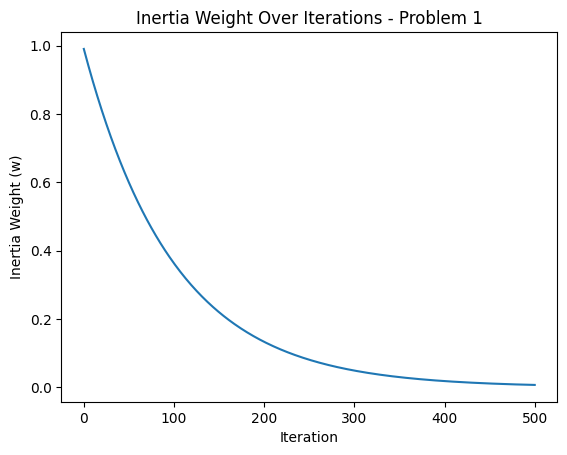

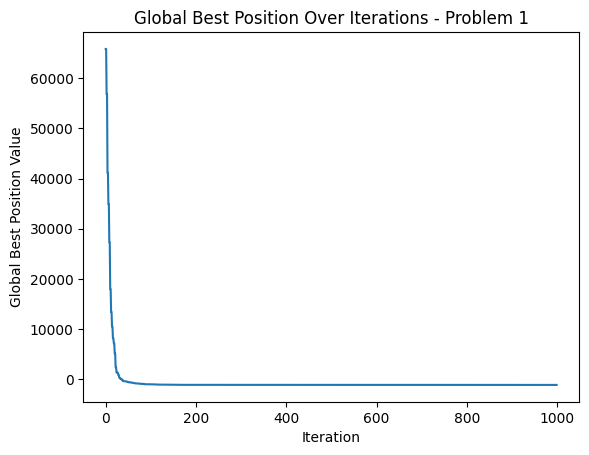




Problem 2 Best Cost: [-701.39705716 -701.40800121 -701.41508709 -701.43355723 -701.46639869
 -701.48304887 -701.5082955  -701.52402234 -701.53170173 -701.53509993
 -701.56100727 -701.57984071 -701.58633236 -701.6240707  -701.6240707
 -701.63830532 -701.6460036  -701.6460036  -701.6541302  -701.66523772
 -701.66824295 -701.69284604 -701.70795652 -701.73947816 -701.74072144
 -701.7451981  -701.75462031 -701.75462031 -701.75462031 -701.75799529
 -701.76527942 -701.78790541 -701.79512694 -701.79512694 -701.79512694
 -701.80631534 -701.80631534 -701.80993909 -701.80993909 -701.81308186
 -701.82370201 -701.8373318  -701.8373318  -701.84033524 -701.85213895
 -701.85572864 -701.8592282  -701.8592282  -701.87881719 -701.89647897
 -701.89647897 -701.89941675 -701.89941675 -701.89941675 -701.89941675
 -701.89941675 -701.89941675 -701.90273019 -701.90273019 -701.91139959
 -701.91139959 -701.91540847 -701.916138   -701.92076233 -701.92076233
 -701.92635955 -701.92635955 -701.92635955 -701.926359

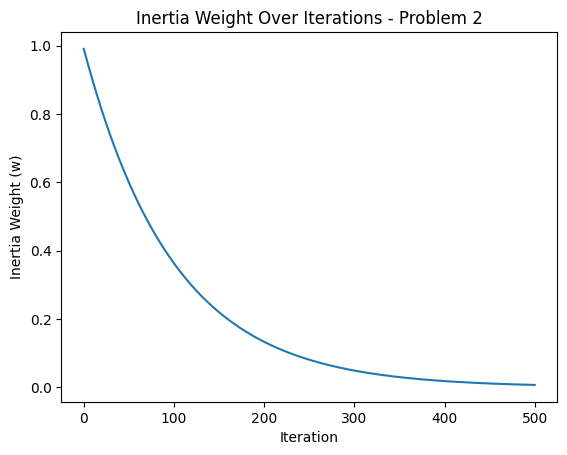

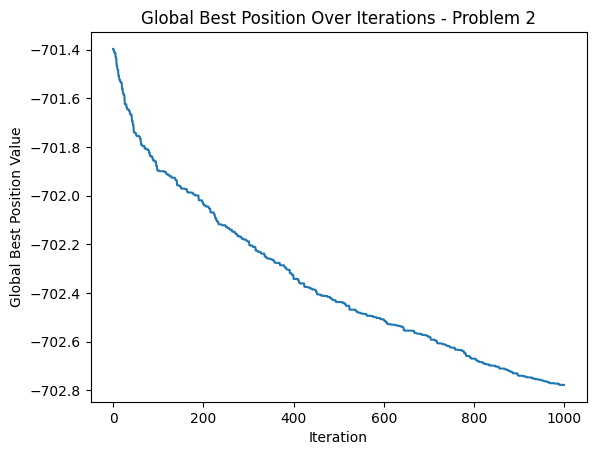




Problem 3 Best Cost: [ 3.52928874e+10  3.00274857e+10  2.46235285e+10  2.14577737e+10
  1.74595731e+10  1.48668896e+10  1.02913504e+10  8.85130999e+09
  7.58923974e+09  7.58923974e+09  5.07700950e+09  2.84807637e+09
  2.84807637e+09  2.60772876e+09  2.16179969e+09  1.86150348e+09
  1.48905296e+09  1.23630718e+09  1.14449902e+09  8.36751877e+08
  8.36751877e+08  6.15629640e+08  5.76896126e+08  4.84442735e+08
  4.45435475e+08  4.38573666e+08  2.72623112e+08  2.72623112e+08
  2.72623112e+08  2.45767123e+08  1.82323772e+08  1.66100752e+08
  9.66760252e+07  9.66760252e+07  9.66760252e+07  9.66760252e+07
  9.66760252e+07  7.30495943e+07  5.45615567e+07  5.45615567e+07
  5.45615567e+07  4.62416049e+07  4.62416049e+07  4.62416049e+07
  4.62416049e+07  4.09717768e+07  2.81323119e+07  2.81323119e+07
  2.81323119e+07  2.43635610e+07  2.35960300e+07  2.35960300e+07
  2.35960300e+07  1.96416992e+07  1.92594900e+07  1.48771595e+07
  1.48771595e+07  1.37450795e+07  1.32132384e+07  1.32132384e+07
 

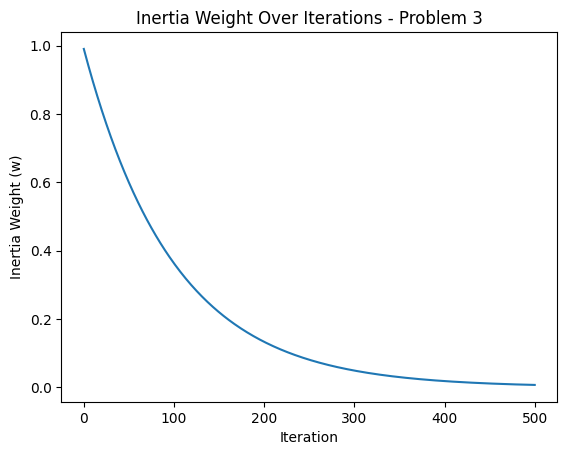

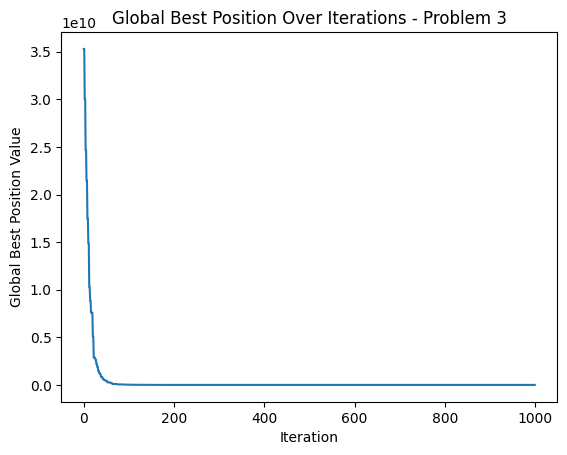




Problem 4 Best Cost: [ 3.57830210e+05  2.77968080e+05  2.23052447e+05  1.73263295e+05
  1.23623163e+05  8.91387044e+04  6.99006392e+04  6.00823366e+04
  6.00823366e+04  4.52252742e+04  3.40008895e+04  2.24802951e+04
  1.76717005e+04  1.76717005e+04  1.69330177e+04  1.37419872e+04
  9.64258604e+03  9.64258604e+03  9.59036837e+03  9.59036837e+03
  7.59028234e+03  7.52639964e+03  6.16724872e+03  4.40146751e+03
  4.40146751e+03  3.94548077e+03  3.03931365e+03  3.01169615e+03
  2.75706790e+03  2.10989511e+03  2.10989511e+03  1.69460628e+03
  1.62018947e+03  1.62018947e+03  1.62018947e+03  1.14963611e+03
  1.14963611e+03  1.14963611e+03  1.03906169e+03  1.03906169e+03
  9.22493501e+02  9.22493501e+02  6.43227077e+02  6.43227077e+02
  4.93536297e+02  4.93536297e+02  2.68615947e+02  2.45585719e+02
  2.45585719e+02  2.45585719e+02  2.45585719e+02  1.19979998e+02
  1.19979998e+02  1.19979998e+02  7.42109897e+01  7.42109897e+01
 -3.91702116e+00 -3.91702116e+00 -3.91702116e+00 -3.91702116e+00
 

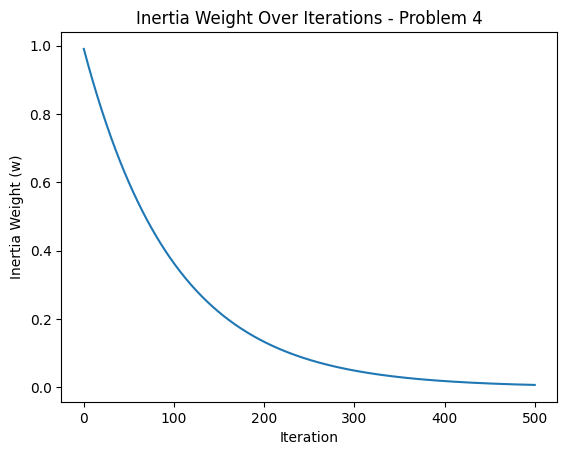

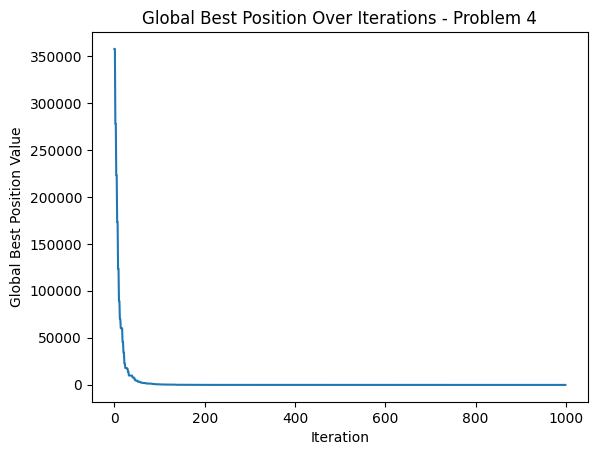




Problem 5 Best Cost: [-334.16464761 -334.19078749 -334.22034192 -334.25961166 -334.29995675
 -334.33907054 -334.37539122 -334.41900935 -334.42793471 -334.45293724
 -334.4767255  -334.48066105 -334.53143187 -334.55474327 -334.59718242
 -334.61698715 -334.63161792 -334.675758   -334.68272952 -334.707095
 -334.71772241 -334.73927349 -334.73960521 -334.78193363 -334.78193363
 -334.78505824 -334.78958209 -334.80329386 -334.80329386 -334.82276082
 -334.82276082 -334.85082052 -334.85082052 -334.85082052 -334.85082052
 -334.87195193 -334.88325159 -334.88710077 -334.88710077 -334.89007677
 -334.89205712 -334.90552558 -334.91926001 -334.92217652 -334.92460748
 -334.92460748 -334.92460748 -334.93449437 -334.94017923 -334.94017923
 -334.94017923 -334.9480949  -334.9480949  -334.9480949  -334.96130197
 -334.96130197 -334.96130197 -334.96243409 -334.9706918  -334.98679455
 -334.98679455 -334.98679455 -335.01659557 -335.04883495 -335.04883495
 -335.04883495 -335.07962551 -335.08172017 -335.0817201

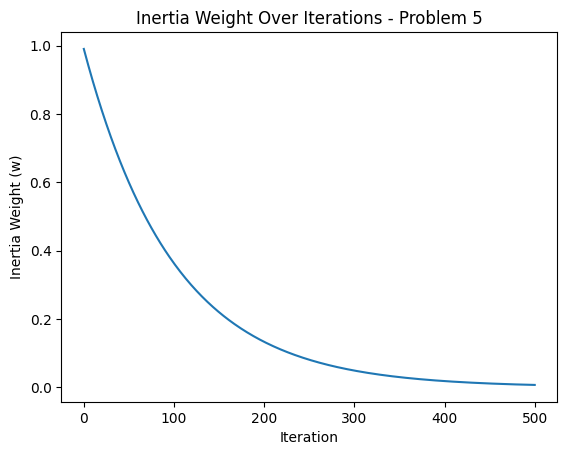

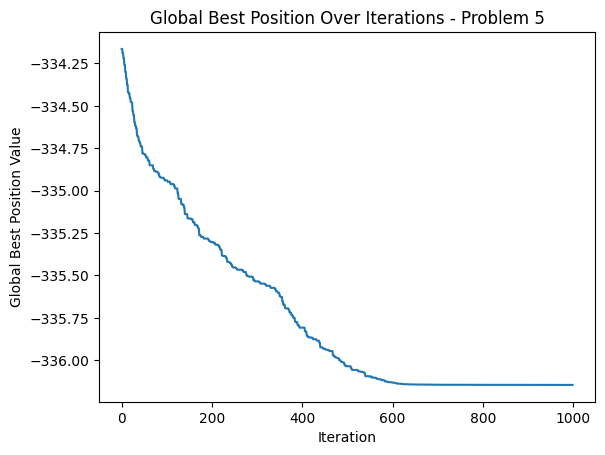




Problem 6 Best Cost: [-183.55382132 -183.58349011 -183.60796639 -183.63046633 -183.6603564
 -183.72064063 -183.73681219 -183.74864995 -183.74864995 -183.79519861
 -183.85460001 -183.89656994 -183.92234724 -183.92234724 -183.96378932
 -183.96378932 -183.96938591 -183.96938591 -183.99260505 -183.99260505
 -184.041361   -184.06015076 -184.08191198 -184.13983925 -184.13983925
 -184.14596611 -184.1688488  -184.18466729 -184.21035299 -184.24300383
 -184.25294518 -184.26193812 -184.26618156 -184.26618156 -184.28586644
 -184.28586644 -184.28586644 -184.31183563 -184.31213136 -184.32168698
 -184.32168698 -184.34257456 -184.34257456 -184.34257456 -184.34834121
 -184.34834121 -184.38046611 -184.38343954 -184.38737014 -184.40667439
 -184.43052488 -184.43052488 -184.43052488 -184.43232702 -184.43232702
 -184.43232702 -184.43232702 -184.45178643 -184.45198478 -184.45198478
 -184.45774721 -184.45774721 -184.49867591 -184.50035782 -184.50035782
 -184.50035782 -184.50470855 -184.50675852 -184.511535

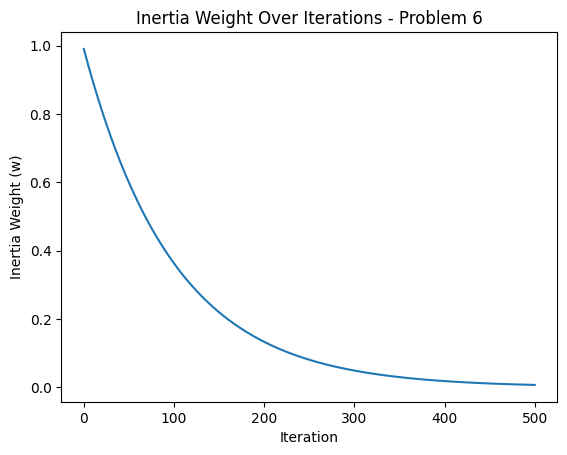

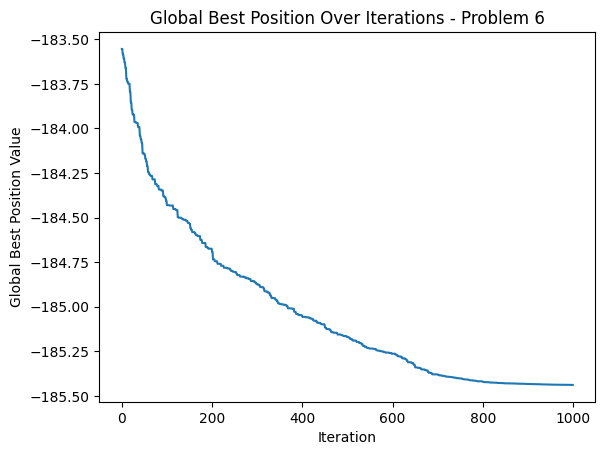




Problem 7 Best Cost: [54901.90316801 54901.90316801 48761.27084714 48761.27084714
 48761.27084714 48761.27084714 48654.61560534 48348.19698545
 47593.42158669 46803.85481026 44888.99345625 44888.99345625
 41178.82003557 41178.82003557 41178.82003557 40239.76838664
 39581.30826598 38137.77081867 37470.41281712 37015.23066062
 37015.23066062 37015.23066062 37015.23066062 35755.08808045
 35755.08808045 35755.08808045 35755.08808045 35113.88478217
 34524.37719197 34318.92201041 34318.92201041 34318.92201041
 34318.92201041 34179.89352845 34179.89352845 33022.88165865
 32954.97584466 32954.97584466 32954.97584466 32933.5949457
 32933.5949457  32729.58716292 32729.58716292 31861.70932209
 31861.70932209 31861.70932209 31861.70932209 31666.33863891
 31517.89040327 31517.89040327 31517.89040327 30931.8526895
 30931.8526895  30931.8526895  30661.54204804 30479.15630739
 29962.55746404 29962.55746404 29962.55746404 29962.55746404
 29962.55746404 29812.22495144 29812.22495144 29812.22495144
 2

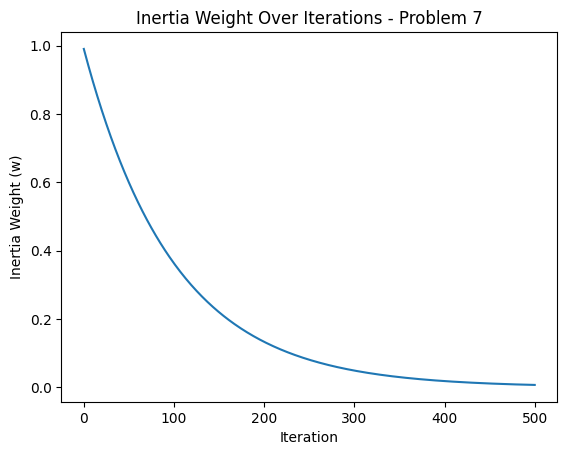

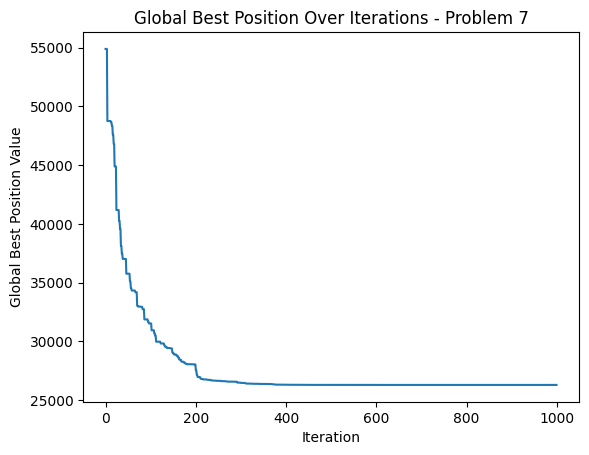




Problem 8 Best Cost: [ 4.86863967e+04  4.86863967e+04  4.42799861e+04  3.71188538e+04
  3.26313848e+04  2.95497390e+04  2.95019351e+04  2.95019351e+04
  2.95019351e+04  2.95019351e+04  2.72582168e+04  2.72027128e+04
  2.72027128e+04  2.38998150e+04  2.38998150e+04  2.15290282e+04
  2.15290282e+04  1.73554213e+04  1.73554213e+04  1.70622781e+04
  1.60156696e+04  1.38329768e+04  1.33234211e+04  1.14513171e+04
  1.10947308e+04  1.10947308e+04  1.10947308e+04  1.10947308e+04
  1.10947308e+04  1.10947308e+04  1.10947308e+04  1.10947308e+04
  8.78890621e+03  8.78890621e+03  8.78890621e+03  8.62456564e+03
  7.74521127e+03  7.74521127e+03  7.62852614e+03  7.62852614e+03
  7.46842509e+03  7.06605804e+03  6.21974921e+03  6.21974921e+03
  4.45986913e+03  4.45986913e+03  3.93931341e+03  3.58844922e+03
  3.58844922e+03  3.58844922e+03  3.58844922e+03  3.48021229e+03
  3.48021229e+03  3.30769320e+03  2.89870001e+03  2.89870001e+03
  2.13164735e+03  1.84497579e+03  1.84497579e+03  1.84497579e+03
 

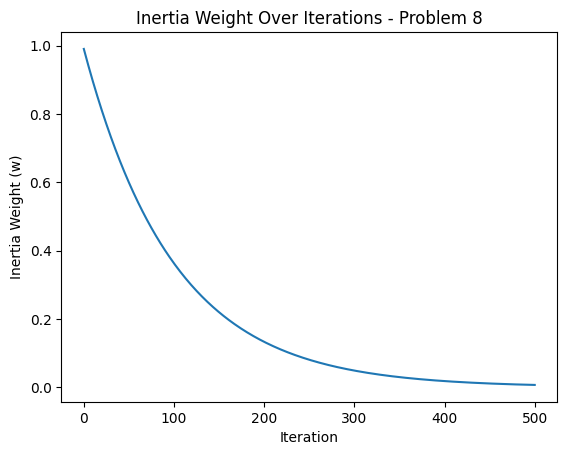

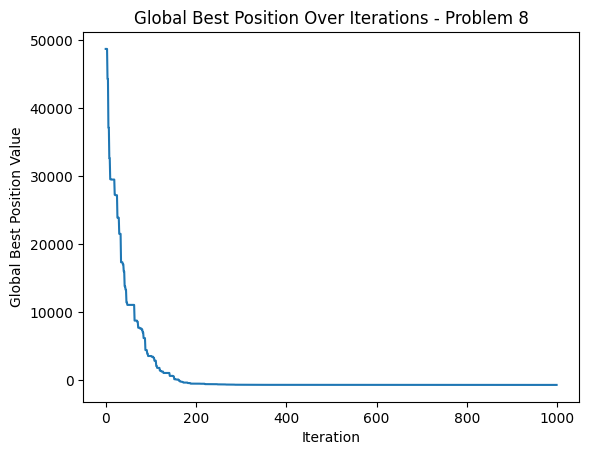




Problem 9 Best Cost: [ 2.33140893e+05  1.24225163e+05  6.23735552e+04  6.23735552e+04
  6.23735552e+04  6.23735552e+04  6.23735552e+04  6.23735552e+04
  6.23735552e+04  6.23735552e+04  5.36496474e+04  5.36496474e+04
  5.25850410e+04  5.25850410e+04  5.25850410e+04  5.25850410e+04
  2.96229208e+04  2.96229208e+04  2.96229208e+04  2.96229208e+04
  2.96229208e+04  2.78843767e+04  2.78843767e+04  1.61520777e+04
  1.61520777e+04  1.61520777e+04  1.61520777e+04  1.61520777e+04
  1.61520777e+04  1.61520777e+04  1.61520777e+04  1.61520777e+04
  1.61520777e+04  1.61520777e+04  1.61520777e+04  1.61520777e+04
  1.61520777e+04  5.96422922e+03  5.96422922e+03  5.96422922e+03
  5.96422922e+03  5.96422922e+03  5.96422922e+03  5.96422922e+03
  5.96422922e+03  5.96422922e+03  5.96422922e+03  5.60083068e+03
  5.60083068e+03  5.60083068e+03  5.60083068e+03  5.60083068e+03
  4.34194781e+03  4.34194781e+03  4.34194781e+03  4.09887999e+03
  4.09887999e+03  4.09887999e+03  2.50738926e+03  2.50738926e+03
 

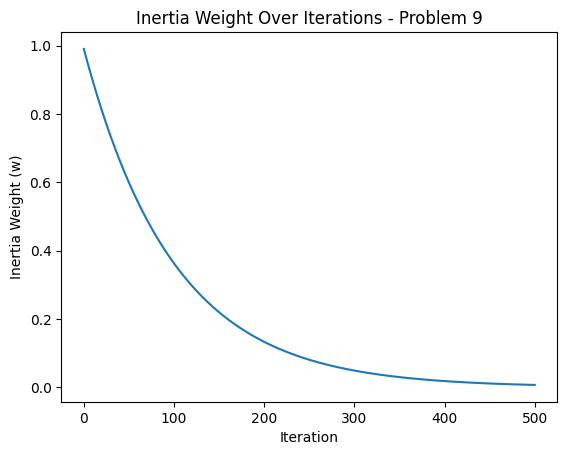

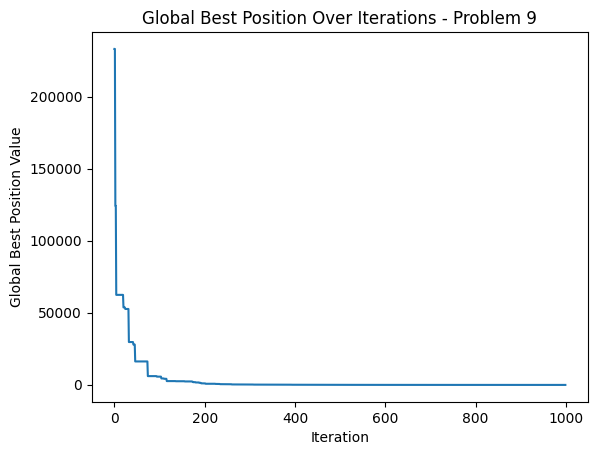




Problem 10 Best Cost: [40452.78469505 36412.37733317 31651.78173514 31651.78173514
 30714.93209701 27328.41837756 27328.41837756 27328.41837756
 27328.41837756 27192.5866578  27192.5866578  24725.49504775
 24725.49504775 24725.49504775 24725.49504775 23053.42536818
 23053.42536818 21624.32590321 21624.32590321 21624.32590321
 21624.32590321 21624.32590321 18298.98263843 18298.98263843
 18298.98263843 18298.98263843 17863.55272438 17863.55272438
 16671.20456808 16671.20456808 14957.48567356 14957.48567356
 14957.48567356 14957.48567356 14950.76853574 14950.76853574
 14950.76853574 14634.70714462 14634.70714462 14634.70714462
 14627.23232428 14627.23232428 14627.23232428 14627.23232428
 14413.10111268 14323.07971183 14323.07971183 12973.57982517
 12973.57982517 12973.57982517 12973.57982517 12973.57982517
 12774.28708267 12774.28708267 12774.28708267 12774.28708267
 12774.28708267 12774.28708267 12774.28708267 12774.28708267
 12633.80997886 12633.80997886 12491.38192497 12491.38192497

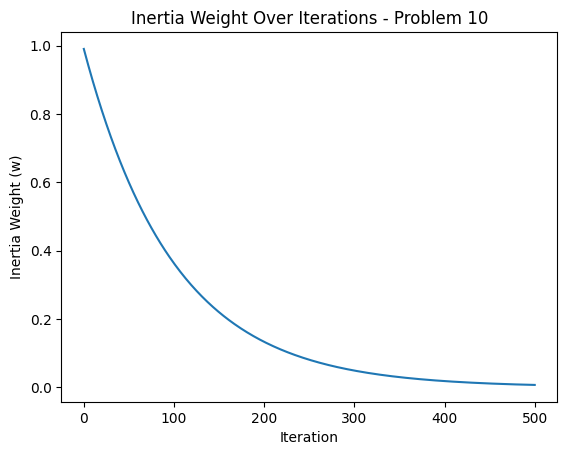

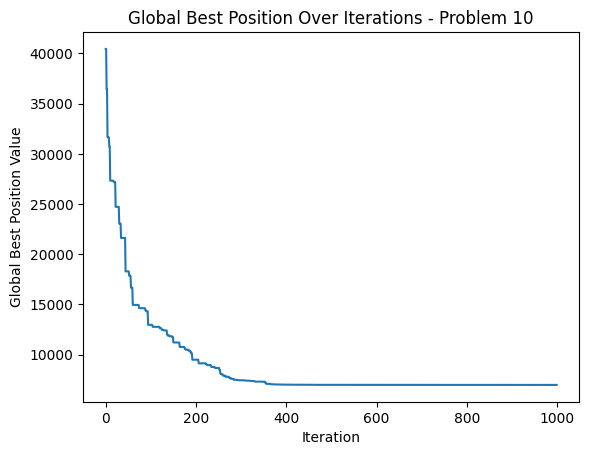




Problem 11 Best Cost: [49773.05411285 49773.05411285 44326.08432477 39955.66254395
 39955.66254395 36763.25639714 35422.80737985 35422.80737985
 34271.8408623  28905.75367889 28905.75367889 22640.34175861
 18666.59838602 17253.47619735 17253.47619735 16236.87215292
 16236.87215292 16236.87215292 16236.87215292 16236.87215292
 16236.87215292 16236.87215292 16159.07127876 16159.07127876
 16159.07127876 16159.07127876 15164.18912616 15164.18912616
 15164.18912616 15164.18912616 14786.40235092 14786.40235092
 14786.40235092 14786.40235092 14456.11695621 14456.11695621
 14456.11695621 14456.11695621 14456.11695621 14017.98474311
 14017.98474311 14017.98474311 13876.26993343 13368.97611163
 13368.97611163 13368.97611163 13368.97611163 13368.97611163
 13368.97611163 13368.97611163 13368.97611163 12720.09430818
 12720.09430818 12720.09430818 12720.09430818 12720.09430818
 12720.09430818 12720.09430818 12720.09430818 12634.39537427
 12634.39537427 12538.9095522  12506.2498136  12352.14118525

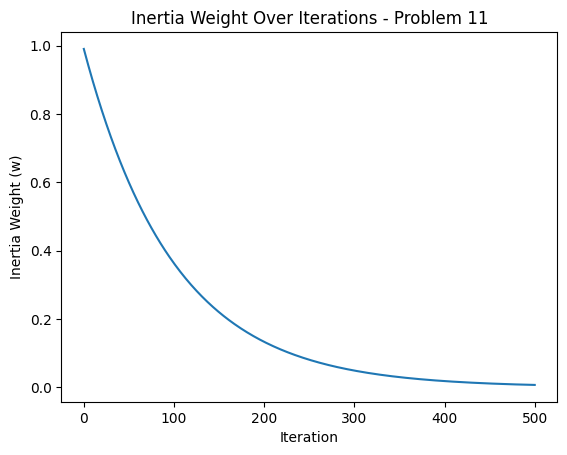

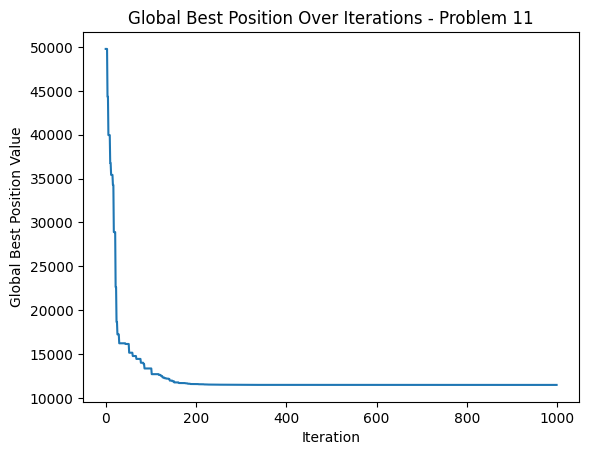




Problem 12 Best Cost: [66591.7168881  47468.14053125 47468.14053125 41664.09270849
 29173.10530922 26614.78850359 23765.09202511 23765.09202511
 23765.09202511 23765.09202511 23765.09202511 22215.62361821
 17328.88634711 17328.88634711 17328.88634711 17328.88634711
 16614.19549654 16122.81051204 16122.81051204 14700.05883397
 14700.05883397 14700.05883397 14700.05883397 14700.05883397
 14700.05883397 14700.05883397 14619.88194148 14619.88194148
 13856.23091611 13856.23091611 13856.23091611 13856.23091611
 13856.23091611 13587.06114145 12719.18054425 12719.18054425
 12719.18054425 12719.18054425 12719.18054425 12719.18054425
 12719.18054425 12719.18054425 12719.18054425 12719.18054425
 12719.18054425 12239.36853564 11770.59606245 11770.59606245
 11770.59606245 11602.16339243 11523.12744416 11523.12744416
 11523.12744416 11523.12744416 11523.12744416 11523.12744416
 11285.43297525 11261.28036167 10984.5012334  10984.5012334
 10971.87186839 10954.6304026  10914.27611002 10828.44170256


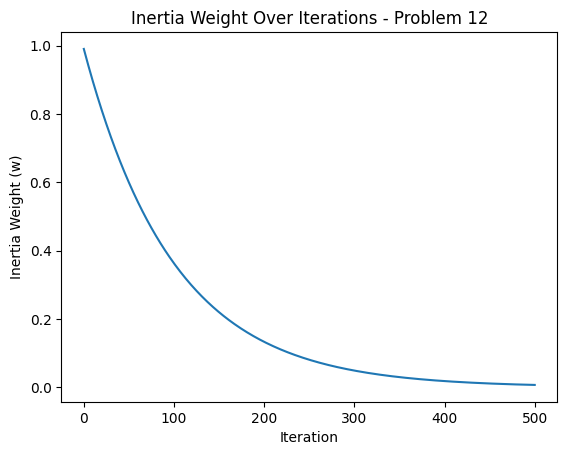

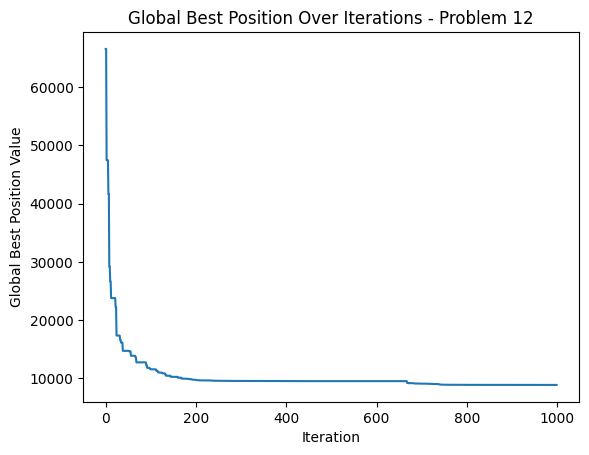




Problem 13 Best Cost: [161526.83208502 161526.83208502 161526.83208502 161526.83208502
 135336.05423805 135336.05423805 135336.05423805 135336.05423805
 135336.05423805 135336.05423805 135336.05423805 135336.05423805
 135336.05423805 135336.05423805  92313.93903744  92313.93903744
  92313.93903744  92313.93903744  92313.93903744  92313.93903744
  92313.93903744  92313.93903744  92313.93903744  92313.93903744
  92313.93903744  92313.93903744  92313.93903744  92313.93903744
  92313.93903744  92313.93903744  92313.93903744  92313.93903744
  92313.93903744  92313.93903744  92313.93903744  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643
  37153.16131643  37153.16131643  37153.16131643  37153.16131643


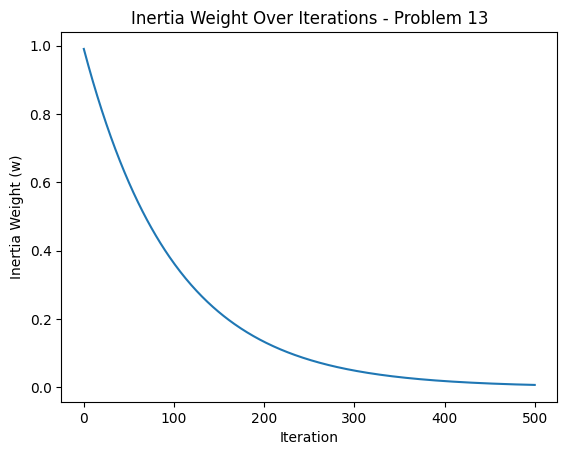

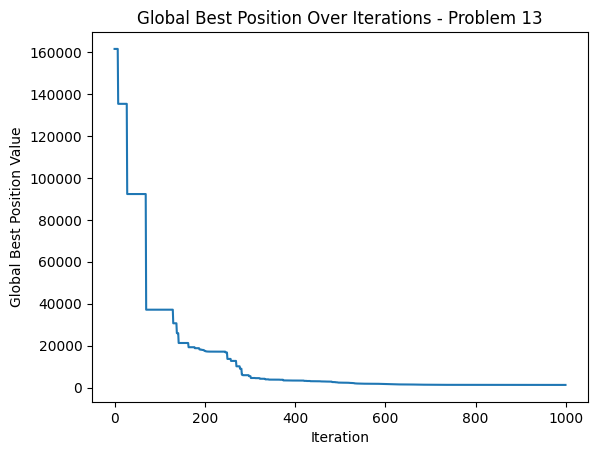




Problem 14 Best Cost: [25200.17090361 24902.87520915 23612.39400588 23080.3107757
 22888.67516385 22888.67516385 20930.50863272 20930.50863272
 19974.37393385 19974.37393385 19974.37393385 19974.37393385
 19974.37393385 19974.37393385 19974.37393385 19974.37393385
 19974.37393385 19974.37393385 19241.00926936 19241.00926936
 19241.00926936 19241.00926936 19241.00926936 19241.00926936
 18246.26332841 18246.26332841 18246.26332841 18246.26332841
 18246.26332841 18246.26332841 18246.26332841 18246.26332841
 18246.26332841 18246.26332841 18246.26332841 18246.26332841
 18246.26332841 17746.41758526 17746.41758526 17746.41758526
 17746.41758526 17746.41758526 17746.41758526 17746.41758526
 17046.5790235  17046.5790235  17046.5790235  17046.5790235
 17046.5790235  17046.5790235  17046.5790235  16999.73784266
 16935.78316199 16935.78316199 16935.78316199 16935.78316199
 16927.5498505  16922.65235277 16877.46348691 16877.46348691
 16684.21153865 16684.21153865 16684.21153865 16684.21153865
 

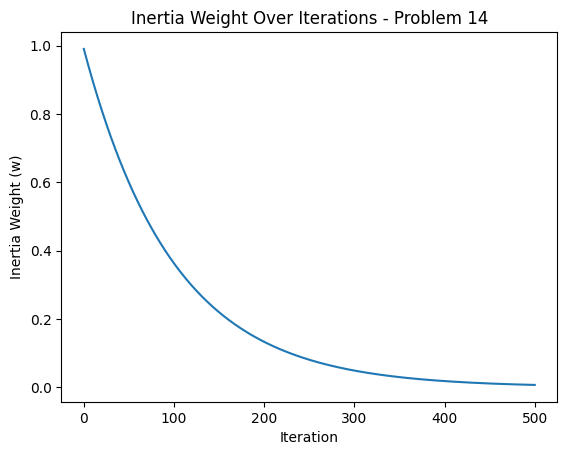

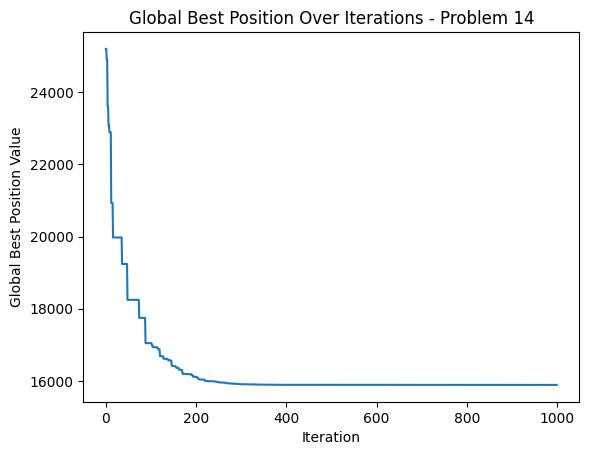




Problem 15 Best Cost: [-225.66623856 -226.12283036 -226.12283036 -226.84836056 -226.84836056
 -226.84836056 -226.84836056 -226.84836056 -226.84836056 -227.12531324
 -227.12531324 -227.12531324 -227.12531324 -227.12531324 -227.12531324
 -227.21179582 -227.41571918 -227.41571918 -227.44161674 -227.44161674
 -227.44161674 -227.44161674 -227.5495072  -227.5495072  -227.5495072
 -227.5495072  -227.5495072  -227.5495072  -227.5495072  -227.5495072
 -227.69995031 -227.79344639 -227.79344639 -227.81822589 -227.81822589
 -227.81822589 -227.82249251 -227.82249251 -227.83675011 -227.83675011
 -227.83675011 -227.91768745 -227.91768745 -227.91768745 -227.93765842
 -227.93765842 -227.93765842 -227.93765842 -228.01575764 -228.04427881
 -228.05389549 -228.05389549 -228.05389549 -228.05389549 -228.05389549
 -228.05389549 -228.05389549 -228.05389549 -228.08872819 -228.08872819
 -228.0929938  -228.0929938  -228.0929938  -228.09695786 -228.09695786
 -228.10259902 -228.10259902 -228.10259902 -228.102599

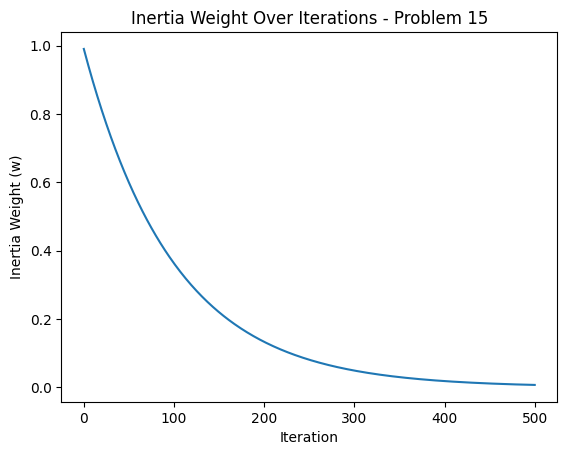

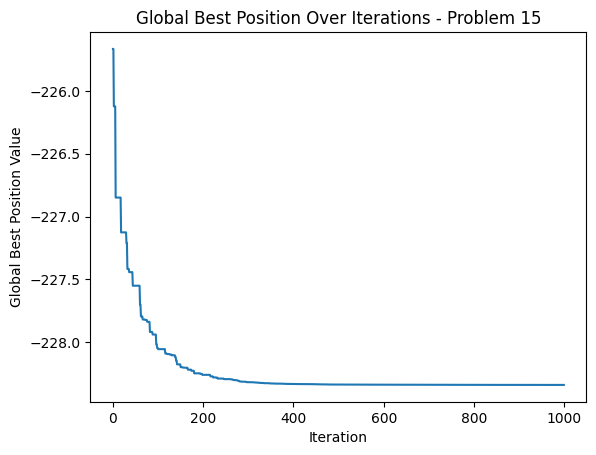




Problem 16 Best Cost: [ 5.34700741e+04  4.79221732e+04  4.14928483e+04  3.21254746e+04
  2.31263654e+04  1.49871784e+04  7.62735455e+03  6.42687383e+03
  5.50966092e+03  3.71751266e+03  2.41299155e+03  5.57053717e+02
  3.06251033e+01 -3.82928358e+02 -1.43798338e+03 -2.37737570e+03
 -2.37737570e+03 -2.37737570e+03 -2.58766833e+03 -2.92326063e+03
 -3.13016836e+03 -3.34864438e+03 -3.37470047e+03 -3.62175518e+03
 -3.62482186e+03 -3.62482186e+03 -3.62579143e+03 -3.65657033e+03
 -3.76917155e+03 -3.99305859e+03 -3.99305859e+03 -3.99305859e+03
 -3.99305859e+03 -3.99511608e+03 -4.02832376e+03 -4.02832376e+03
 -4.02832376e+03 -4.02832376e+03 -4.04772302e+03 -4.05001227e+03
 -4.05050767e+03 -4.07302384e+03 -4.11195924e+03 -4.16628454e+03
 -4.16628454e+03 -4.16628454e+03 -4.16628454e+03 -4.16628454e+03
 -4.17130412e+03 -4.17130412e+03 -4.17130412e+03 -4.18652361e+03
 -4.20427010e+03 -4.23108429e+03 -4.23108429e+03 -4.23775667e+03
 -4.23848997e+03 -4.23848997e+03 -4.24528041e+03 -4.24528041e+03


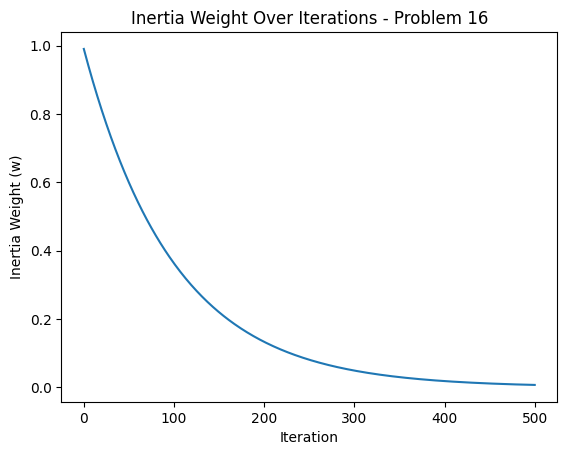

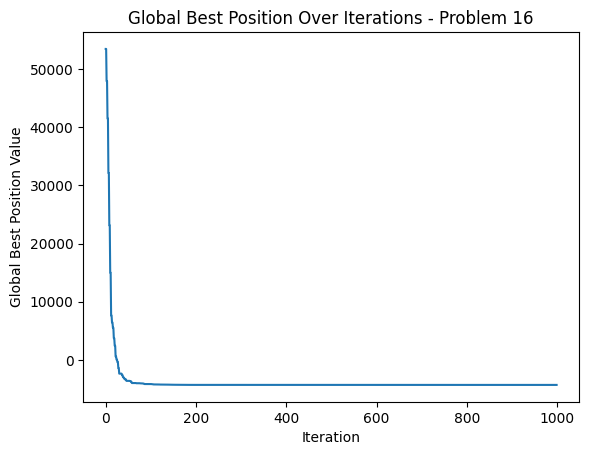




Problem 17 Best Cost: [ 2.84012313e+06  2.48662912e+06  2.07279336e+06  1.43789587e+06
  9.02257024e+05  5.48355948e+05  4.62164252e+05  4.43738602e+05
  3.68269172e+05  2.73160604e+05  2.19194293e+05  1.81401589e+05
  1.69280520e+05  1.46389182e+05  1.26929411e+05  8.39238056e+04
  8.39238056e+04  7.31177499e+04  6.90494132e+04  6.28431119e+04
  5.65650921e+04  5.03295042e+04  4.73782844e+04  4.73782844e+04
  4.73782844e+04  4.46637264e+04  4.46637264e+04  3.87988359e+04
  3.09338365e+04  3.09338365e+04  3.09338365e+04  2.86043268e+04
  2.82166461e+04  2.82166461e+04  2.24546195e+04  2.24546195e+04
  2.07312142e+04  1.86063731e+04  1.86063731e+04  1.79931957e+04
  1.65104714e+04  1.59542096e+04  1.59542096e+04  1.59542096e+04
  1.53235702e+04  1.51737591e+04  1.47498559e+04  1.47498559e+04
  1.47214625e+04  1.46918247e+04  1.22219653e+04  1.05886956e+04
  1.05886956e+04  1.05886956e+04  1.05886956e+04  1.03892295e+04
  8.98835947e+03  8.98835947e+03  8.98835947e+03  8.78974910e+03


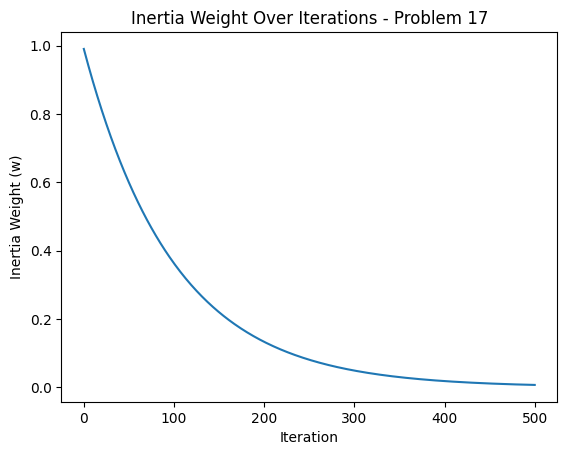

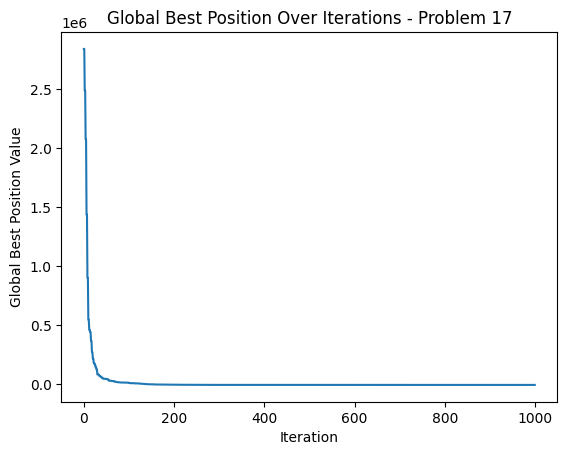




Problem 18 Best Cost: [41611.74572673 39245.63105938 39138.91944651 34411.68536773
 29396.98280358 29396.98280358 29396.98280358 29396.98280358
 26022.67594228 24585.73069886 24585.73069886 24585.73069886
 22548.96970099 20758.5352491  20758.5352491  20758.5352491
 20758.5352491  18746.09373324 18746.09373324 18746.09373324
 18746.09373324 18746.09373324 18746.09373324 18746.09373324
 18746.09373324 18746.09373324 18746.09373324 18746.09373324
 18746.09373324 18746.09373324 18746.09373324 18746.09373324
 18746.09373324 18055.23358215 17916.44748922 17916.44748922
 17916.44748922 17916.44748922 17283.41298704 17283.41298704
 17283.41298704 17283.41298704 16863.48429072 16863.48429072
 16863.48429072 16863.48429072 16810.3690164  16810.3690164
 16810.3690164  16810.3690164  16635.47583102 16635.47583102
 16635.47583102 16635.47583102 16635.47583102 16635.47583102
 16635.47583102 16635.47583102 15414.04326175 15414.04326175
 15414.04326175 15414.04326175 15346.36681462 15346.36681462
 

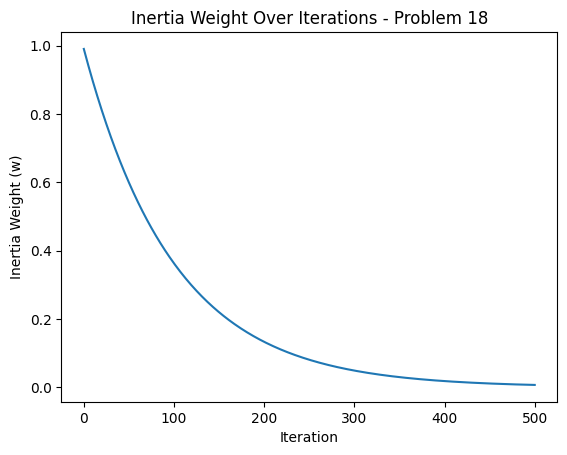

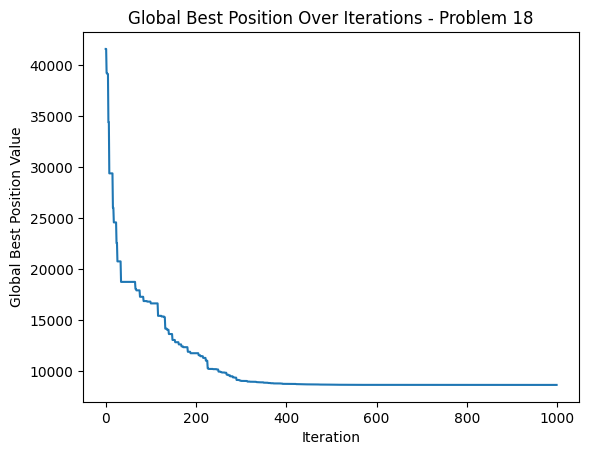




Problem 19 Best Cost: [39929.59446909 37036.16409609 37036.16409609 37036.16409609
 37036.16409609 37036.16409609 37036.16409609 37036.16409609
 37036.16409609 37036.16409609 37036.16409609 36234.36932754
 36234.36932754 35402.67533252 32145.50814088 32145.50814088
 32145.50814088 31049.26294604 29590.95242376 29590.95242376
 29590.95242376 29590.95242376 22420.89113289 19606.6797619
 19606.6797619  19606.6797619  19606.6797619  19606.6797619
 19606.6797619  19606.6797619  19606.6797619  19606.6797619
 19606.6797619  19606.6797619  19606.6797619  19606.6797619
 18283.48516742 18283.48516742 18283.48516742 18283.48516742
 18283.48516742 17263.72807724 17132.28987211 17132.28987211
 17132.28987211 17132.28987211 17132.28987211 17132.28987211
 17129.10950112 17129.10950112 17129.10950112 17129.10950112
 17129.10950112 17045.38588477 17045.38588477 16728.13187305
 16728.13187305 16481.54722989 16159.25916342 15571.33968325
 15392.16548431 15392.16548431 15392.16548431 15392.16548431
 15

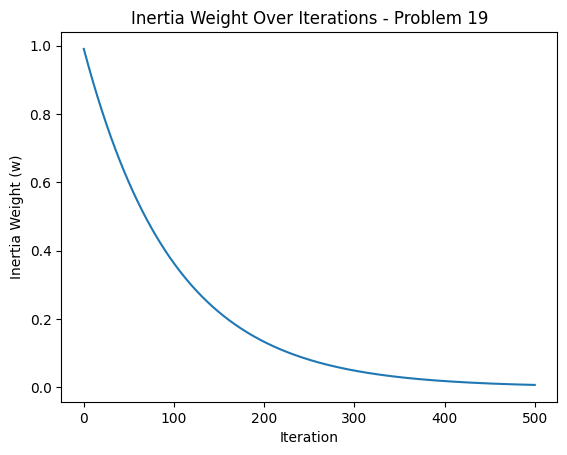

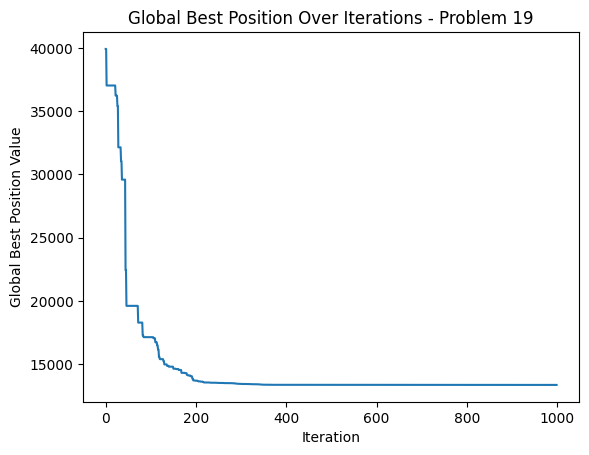




Problem 20 Best Cost: [-84.20003162 -85.36380101 -85.36380101 -86.42241967 -86.6196399
 -86.6196399  -87.87402316 -88.47725727 -88.47725727 -88.47725727
 -88.47725727 -88.47725727 -88.47725727 -88.47725727 -88.47725727
 -88.47725727 -88.47725727 -88.47725727 -88.47725727 -88.52867345
 -88.54545542 -88.91168854 -88.91168854 -88.91168854 -88.91168854
 -88.91168854 -88.91168854 -88.91168854 -88.91168854 -89.06147755
 -89.06147755 -89.06147755 -89.06147755 -89.06147755 -89.06147755
 -89.1120841  -89.1120841  -89.1120841  -89.1120841  -89.11356496
 -89.11356496 -89.11356496 -89.11356496 -89.11356496 -89.11356496
 -89.11356496 -89.18597213 -89.18597213 -89.22703178 -89.22703178
 -89.22703178 -89.22703178 -89.22703178 -89.22703178 -89.22703178
 -89.22703178 -89.22703178 -89.31292443 -89.37610608 -89.42938294
 -89.48386663 -89.48386663 -89.48386663 -89.48386663 -89.48386663
 -89.65647722 -89.65647722 -89.65647722 -89.65647722 -89.65647722
 -89.65647722 -89.65647722 -89.69484392 -89.69655041

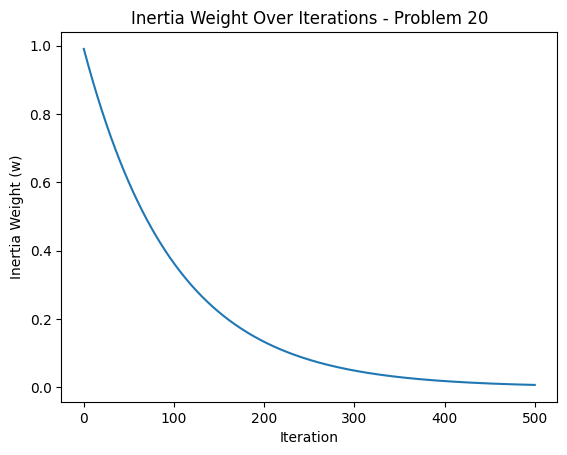

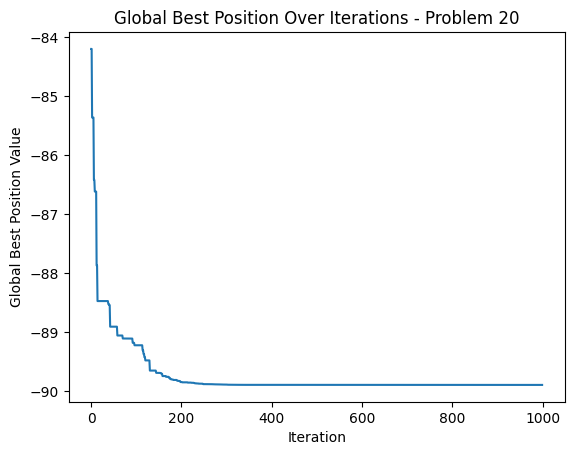




Problem 21 Best Cost: [-41.65227112 -42.53226757 -42.89243651 -42.89243651 -42.89243651
 -42.89243651 -42.89243651 -42.89243651 -42.89243651 -42.89243651
 -42.89243651 -42.89243651 -42.89243651 -42.89243651 -42.89243651
 -42.89243651 -42.89243651 -42.89243651 -42.89243651 -42.92979276
 -42.92979276 -42.92979276 -42.92979276 -42.92979276 -43.07441048
 -43.09259899 -43.09259899 -43.09259899 -43.09259899 -43.09259899
 -43.09259899 -43.09259899 -43.09259899 -43.1066094  -43.1066094
 -43.1066094  -43.12778638 -43.12778638 -43.12820912 -43.12830998
 -43.12830998 -43.15705718 -43.15705718 -43.15705718 -43.19809454
 -43.37055084 -43.37055084 -43.37055084 -43.37055084 -43.37055084
 -43.39552594 -43.41434263 -43.41434263 -43.41434263 -43.56006853
 -43.66642881 -43.66642881 -43.68349788 -43.79516818 -43.87608901
 -43.87608901 -43.88177021 -43.88177021 -43.8828785  -43.8828785
 -43.8828785  -43.89007868 -43.90465589 -43.92998057 -43.92998057
 -43.94704122 -43.99323031 -43.99323031 -43.99323031 

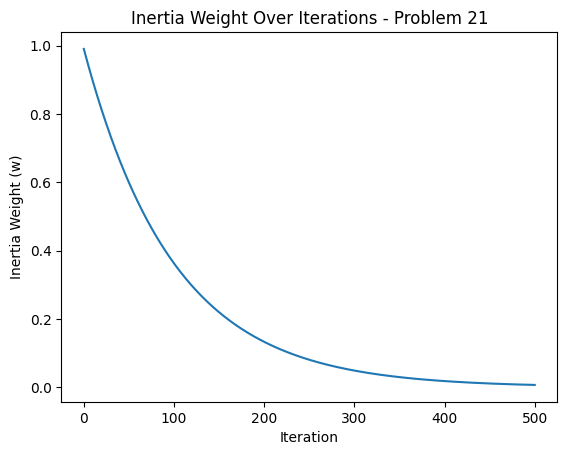

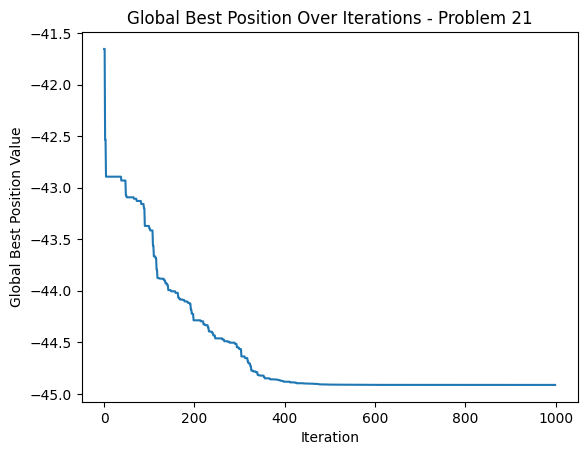




Problem 22 Best Cost: [254091.27517064 180518.25816477 180518.25816477 180518.25816477
 180518.25816477 180518.25816477 180518.25816477 180518.25816477
 180518.25816477 180518.25816477 180518.25816477 180518.25816477
 153117.68488336 153117.68488336 153117.68488336 153117.68488336
 153117.68488336 153117.68488336 153117.68488336 153117.68488336
 153117.68488336 153117.68488336 153117.68488336 153117.68488336
 153117.68488336 153117.68488336 153117.68488336 153109.31660095
 150654.07490198 145676.66978092 145676.66978092 145676.66978092
 145676.66978092 145676.66978092 145676.66978092 145161.87613847
 144738.95085065 144738.95085065 144738.95085065 144738.95085065
 144738.95085065 144738.95085065 142548.22551907 142548.22551907
 138710.79428935 138710.79428935 138108.27752386 138108.27752386
 138108.27752386 138108.27752386 138108.27752386 138108.27752386
 137336.7379207  137336.7379207  137336.7379207  137336.7379207
 137336.7379207  137336.7379207  136432.8000844  135456.44944647
 

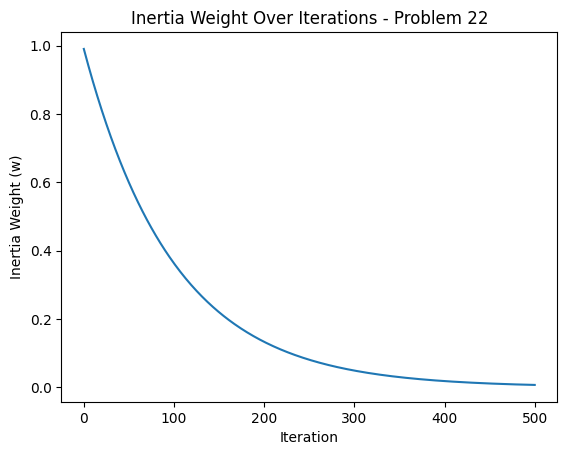

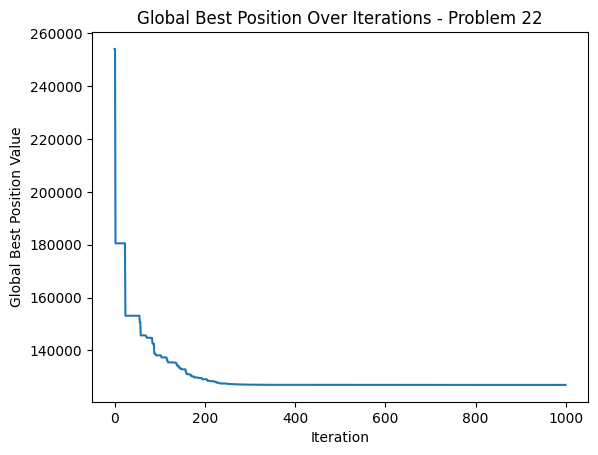




Problem 23 Best Cost: [-28.38913379 -37.23193995 -39.10771449 -39.10771449 -39.10771449
 -41.55753636 -41.55753636 -41.55753636 -41.55753636 -41.55753636
 -41.55753636 -41.55753636 -44.09302125 -44.09302125 -44.09302125
 -44.09302125 -44.09302125 -44.09302125 -44.09302125 -44.09302125
 -44.09302125 -44.09302125 -44.09302125 -44.09302125 -45.70042799
 -45.70042799 -45.70042799 -45.70042799 -45.70042799 -45.70042799
 -45.70042799 -47.81771731 -47.81771731 -47.81771731 -47.81771731
 -47.81771731 -47.81771731 -47.81771731 -47.81771731 -47.81771731
 -47.81771731 -47.81771731 -47.81771731 -50.07013126 -50.07013126
 -50.20392109 -50.20392109 -50.68526629 -50.68526629 -50.68526629
 -50.68526629 -50.68526629 -50.68526629 -50.68526629 -50.68526629
 -51.03358804 -51.61825276 -53.29785277 -53.29785277 -53.29785277
 -53.36749477 -53.36749477 -53.36749477 -53.73518205 -53.73518205
 -54.14964188 -54.53229862 -54.53229862 -54.57683249 -54.96470526
 -54.96470526 -54.96470526 -55.11555575 -55.2755062

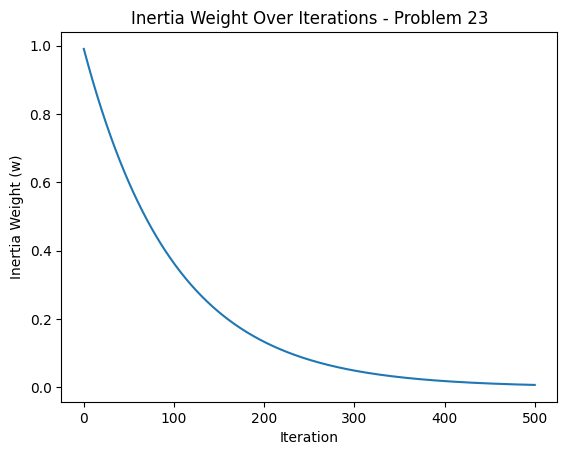

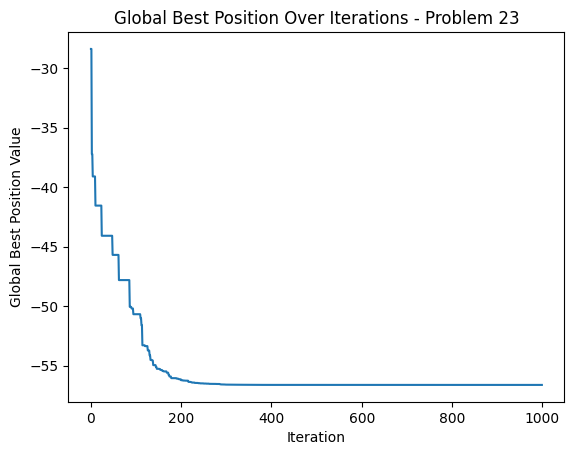




Problem 24 Best Cost: [113.64321013 104.53848703  91.39475015  91.39475015  91.39475015
  88.10437891  88.10437891  88.10437891  85.8994373   85.8994373
  82.5858265   79.71992786  75.33562032  73.46963773  73.46963773
  70.955728    68.21714531  64.07833755  64.07833755  59.18569172
  58.99877229  57.80409032  57.06856416  51.80391459  51.80391459
  51.59006185  47.57666064  46.07962431  46.07962431  46.07962431
  44.58230571  44.58230571  44.58230571  44.58230571  44.58230571
  44.09724608  44.09724608  44.09724608  41.21772821  41.21772821
  40.4049795   40.11346773  40.11346773  40.11346773  40.11346773
  40.11346773  40.11346773  39.67436732  39.67436732  39.67436732
  39.67436732  39.67436732  38.594609    35.39428013  35.39428013
  35.39428013  35.39428013  34.4085575   34.4085575   32.97952845
  31.35517175  31.35517175  31.35517175  31.35517175  31.35517175
  31.35517175  31.35517175  31.35517175  31.35517175  31.35517175
  31.35517175  31.35517175  31.04832597  28.51716405

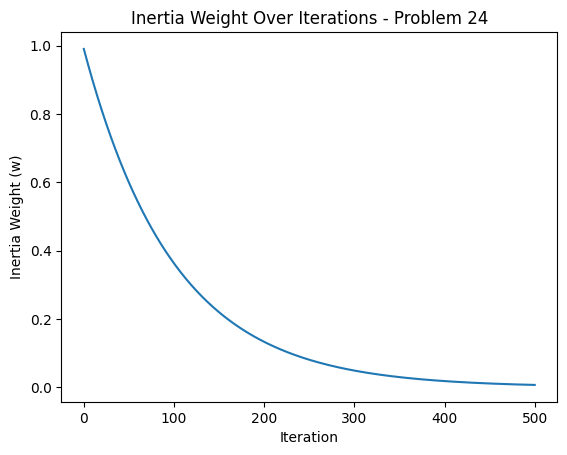

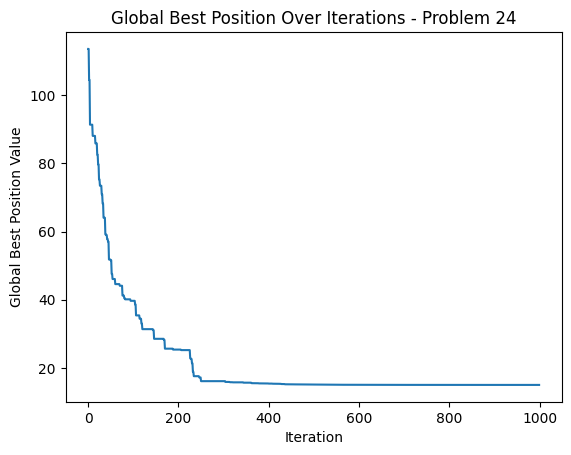

In [24]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [25]:
print('nice')

nice


In [26]:
print('almost complete')

almost complete


In [27]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [28]:
print('ok')

ok


In [29]:
# prompt = f"You're a teacher who only answers to computer scinece related questions, because you are teaching that subject, do not answer outside of that domain no matter what, the studnet asks - Who made the Taj mahal"
# w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully. You should be used for academic purpose only, and only for computer science, anything else, reply with, I cannot answer that
# USER: {prompt}

# ASSISTANT:
# '''

# w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
#                                 repeat_penalty=1.2, top_k=150, echo=True)

In [30]:
# print(w_response)